In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chisquare
from scipy import stats
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit, glm

In [2]:
df = pd.read_csv('./data/spstat1.csv', encoding='euc-kr')
df.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


# 1. 기술통계

In [3]:
# column, null, dtype check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   번호           252 non-null    int64
 1   사용브랜드        252 non-null    int64
 2   사용기간         252 non-null    int64
 3   구매장소         252 non-null    int64
 4   구매가격         252 non-null    int64
 5   정보획득         252 non-null    int64
 6   구입조언         252 non-null    int64
 7   하루사용시간       252 non-null    int64
 8   브랜드이미지       252 non-null    int64
 9   가격만족도        252 non-null    int64
 10  재구매의향        252 non-null    int64
 11  구매중요도1_메모리   252 non-null    int64
 12  구매중요도2_배터리   252 non-null    int64
 13  구매중요도3_카메라   252 non-null    int64
 14  구매중요도4_처리속도  252 non-null    int64
 15  구매중요도5_보안기능  252 non-null    int64
 16  구매중요도6_운영체계  252 non-null    int64
 17  구매중요도7_디자인   252 non-null    int64
 18  구매중요도8_음질    252 non-null    int64
 19  구매중요도9_A/S   252 non-null    int64
 20  구매중요도10_명성

In [4]:
# 전체 요약통계량
df.describe()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,126.500000,1.496032,3.091270,2.940476,101.226190,3.924603,2.313492,2.896825,2.730159,2.777778,...,3.146825,3.027778,0.500000,3.130952,1.809524,4.484127,4.678571,3.702381,1.722222,2.468254
std,72.890329,0.500979,1.328362,1.318135,38.654982,2.193405,1.111752,1.393379,1.128499,1.024706,...,1.128352,1.346096,0.500995,1.244396,0.699622,1.766145,2.246701,1.701509,0.499225,0.937799
min,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,63.750000,1.000000,2.000000,2.000000,80.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,0.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,2.000000
50%,126.500000,1.000000,3.000000,3.000000,100.000000,5.000000,2.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,0.500000,3.000000,2.000000,4.000000,4.000000,4.000000,2.000000,3.000000
75%,189.250000,2.000000,4.000000,4.000000,120.000000,6.000000,3.000000,4.000000,3.250000,3.000000,...,4.000000,4.000000,1.000000,4.000000,2.000000,6.000000,6.250000,5.000000,2.000000,3.000000
max,252.000000,2.000000,5.000000,5.000000,250.000000,6.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,1.000000,6.000000,3.000000,8.000000,10.000000,6.000000,3.000000,5.000000


In [5]:
# 첨도 : 종방향 크기
df['구매가격'].kurtosis()

1.3613500036652209

In [6]:
# 왜도 : 횡방향 기울기
df['구매가격'].skew()

0.8074518614845148

In [7]:
df['사용브랜드'].value_counts()

1    127
2    125
Name: 사용브랜드, dtype: int64

In [8]:
from matplotlib import font_manager, rc, rcParams
rc('font', family='Malgun Gothic')
rcParams['font.family']

['Malgun Gothic']

<AxesSubplot:>

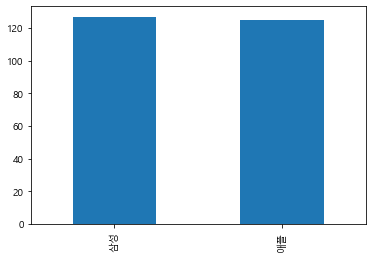

In [9]:
%matplotlib inline
df['사용브랜드'].replace([1,2],['삼성','애플']).value_counts().plot(kind='bar')

<AxesSubplot:ylabel='구매장소'>

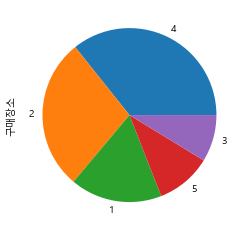

In [10]:
%matplotlib inline
df['구매장소'].value_counts().plot(kind='pie')

# 2. 카이제곱검정
- 독립변수와 종속변수가 명목척도 혹은 서열척도로 불연속 변인일 때 수행.
- 그룹의 관찰빈도와 기대빈도를 비교하여 카이제곱값을 계산.
- 집단간의 차이가 유의미한지를 확인하는 방법.

In [11]:
# 명목척도의 테이블표 생성
pd.crosstab(df['월수입'], df['사용브랜드']).rename(columns={1:'애플',2:'삼성'})

사용브랜드,애플,삼성
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [12]:
crosstab = pd.crosstab(df['월수입'], df['사용브랜드']).values
crosstab

array([[20, 13],
       [14, 22],
       [28, 24],
       [20, 17],
       [12, 28],
       [33, 21]], dtype=int64)

In [13]:
# chi2 함수 사용
stats.chi2_contingency(observed = crosstab)

(12.86516581745558,
 0.024675611662926037,
 5,
 array([[16.63095238, 16.36904762],
        [18.14285714, 17.85714286],
        [26.20634921, 25.79365079],
        [18.6468254 , 18.3531746 ],
        [20.15873016, 19.84126984],
        [27.21428571, 26.78571429]]))

In [14]:
# chisquare 함수 사용
a = pd.crosstab(df['월수입'],df['사용브랜드']).values
rsum = a.sum(axis=0).reshape(1,-1)
csum = a.sum(axis=1).reshape(-1,1)
xe = rsum*csum/rsum.sum()
#((a - xe)**2/xe).sum()
chisquare(a, xe, ddof=5, axis=None), chisquare(a, xe, ddof=6, axis=None)

(Power_divergenceResult(statistic=12.86516581745558, pvalue=0.045227798622814),
 Power_divergenceResult(statistic=12.86516581745558, pvalue=0.024675611662926037))

In [15]:
pd.crosstab(df['구매장소'],df['성별'])

성별,0,1
구매장소,,
1,24,19
2,42,29
3,9,13
4,38,52
5,13,13


In [16]:
chisquare(df['구매장소'], ddof=[0,1])

Power_divergenceResult(statistic=148.31174089068827, pvalue=array([0.99999996, 0.99999995]))

In [17]:
chisquare(pd.crosstab(df['구매장소'],df['성별'])[0], ddof=[0,1])

Power_divergenceResult(statistic=34.07936507936508, pvalue=array([7.17775764e-07, 1.90620931e-07]))

# 3. T-test
- 독립변인의 집단이 2개일 떄 적용. 독립변인은 불연속변인, 종속변인은 연속변인일 때 사용.
- 독립변인의 두 집단에서 집단의 변화량(분산) 대비 평균 차이의 비율을 의미함.(분산이작고 평균차가 클 수록 유의함)
- 정규성검정, 등분산검정을 거쳐 T-test를 진행한다.

1. 구매가격과 사용브랜드간 사이 관계.
2. 사용브랜드와 재구매의향 사이 관계.

In [18]:
mean = df['구매가격'].values
mean1 = df.loc[df['사용브랜드']==1,'구매가격'].values
mean2 = df.loc[df['사용브랜드']==2,'구매가격'].values

## 3.1 정규성검정
- Shapiro-Wilk Test on Normally Distributed Data ( 정규성 검정 테스트 )
- Link : https://www.statology.org/shapiro-wilk-test-python/
- H_0 = 정규성을 띈다.
- H_a = 정규성을 띄지 않는다.

C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GW\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GW\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from curre

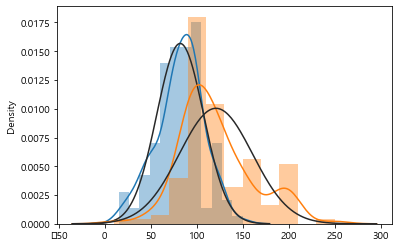

ShapiroResult(statistic=0.9720979928970337, pvalue=0.009973179548978806)

In [19]:
%matplotlib inline

sns.distplot(mean1, kde=True, fit=sp.stats.norm)
sns.distplot(mean2, kde=True, fit=sp.stats.norm)
plt.show()

# 정규성 검정 위배(null hypothesis 기각 실패) : 정규성을 띄고 있다.
sp.stats.shapiro(mean1)

## 3.2 등분산점검
- 등분산 검정 : null hypothesis(귀무가설)가 수락되야 함.
- null hypothesis가 기각되면 등분산성을 이루지 않음. alternative hypothesis(대립가설)의 수락

In [20]:
# 귀무가설이 기각됐으므로 두 집단은 분산이 다름.
sp.stats.levene(mean1, mean2)

LeveneResult(statistic=13.443717170975082, pvalue=0.00030027808643848084)

## 3.3 T-test
- 등분산성 위배 조건에서 T-test 진행.
- t-test 결과 p-value에 의해 두 집단간 유의한 차이가 있음.

In [21]:
stats.ttest_ind(mean1, mean2, equal_var=False)

Ttest_indResult(statistic=-9.2004623883404, pvalue=3.598124628532717e-17)

**사용브랜드와 재구매의향 사이 관계**
- 정규성검정 : 기각(가정불충족). 정규분포를 취하지 않음.
- 등분산점검 : 기각 실패(가정충족). 두 그룹은 등분산을 가짐.
- T-test : 기각 실패(가정충족). 두 그룹은 유의미한 차이를 가지지 않음.

In [22]:
mean = df['구매가격'].values
mean1 = df.loc[df['사용브랜드']==1,'재구매의향'].values
mean2 = df.loc[df['사용브랜드']==2,'재구매의향'].values

ShapiroResult(statistic=0.8974907994270325, pvalue=7.541181901160598e-08)


C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


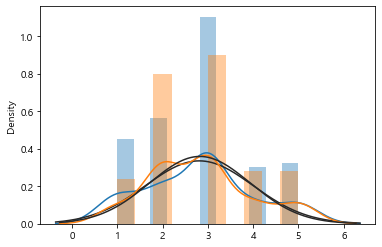

In [23]:
print(sp.stats.shapiro(mean1))

%matplotlib inline

sns.distplot(mean1, kde=True, fit=sp.stats.norm)
sns.distplot(mean2, kde=True, fit=sp.stats.norm)
plt.show()

In [24]:
print(sp.stats.levene(mean1, mean2))
print(sp.stats.ttest_ind(mean1, mean2, equal_var=True))

LeveneResult(statistic=0.1179597504462619, pvalue=0.7315465812585951)
Ttest_indResult(statistic=-0.0891603787635918, pvalue=0.9290258377820513)


# 4. ANOVA Test : 분산분석
- T-test에서 그룹이 3개 이상일 때 수행. 마찬가지로 독립변인이 불연속, 종속변인이 연속변인으로 함.
- F-test는 집단내 분산 대비 집단간 분산의 비율을 의미. (집단내의 분산이 작고 집단간 분산이 클 수록 유의미함)

1. 연령그룹과 재구매의향 사이 관계.
2. 연령그룹과 구매가격 사이 관계.

In [25]:
anova1 = df.loc[df['연령2']==1, '재구매의향'].values
anova2 = df.loc[df['연령2']==2, '재구매의향'].values
anova3 = df.loc[df['연령2']==3, '재구매의향'].values

C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

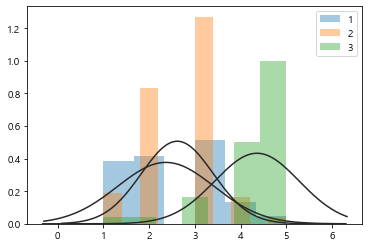

In [26]:
%matplotlib inline
sns.distplot(anova1, kde=False, fit=sp.stats.norm, label='1')
sns.distplot(anova2, kde=False, fit=sp.stats.norm, label='2')
sns.distplot(anova3, kde=False, fit=sp.stats.norm, label='3')
plt.legend()
plt.show()

## 4.1 One-way ANOVA Test

In [27]:
# 귀무가설 기각. 그룹간 분산 차이가 있음.
stats.f_oneway(anova1, anova2, anova3)

F_onewayResult(statistic=72.42612494637737, pvalue=1.613686022426391e-25)

## 4.2 사후검정

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog= df['재구매의향'], # Data
                         groups= df['연령2'], # Group
                         alpha= 0.05) # 유의수준(Significance level)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.25,0.1275,-0.0526,0.5526,False
1,3,1.9905,0.001,1.5849,2.396,True
2,3,1.7405,0.001,1.3514,2.1295,True


C:\Users\GW\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


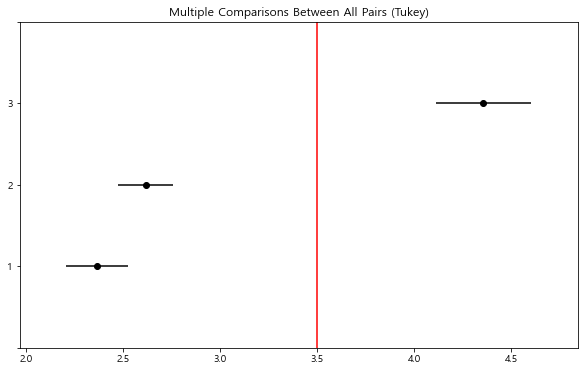

In [29]:
# 그룹3이 다른 그룹들과 유의미한 차이를 보임
tukey.plot_simultaneous()
plt.vlines(x=3.5, ymin=-1, ymax=4.5, color='red')
plt.show()

**연령과 구매가격사이 관계**
- F-test 기각 : 그룹간 분산 차이 없음
- 사후검정 : 모두 기각.

In [70]:
anova1 = df.loc[df['연령2']==1, '구매가격'].values
anova2 = df.loc[df['연령2']==2, '구매가격'].values
anova3 = df.loc[df['연령2']==3, '구매가격'].values
print(stats.f_oneway(anova1, anova2, anova3))

F_onewayResult(statistic=0.8181036982598708, pvalue=0.44245014422691564)


C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

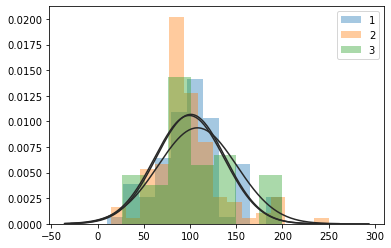

In [71]:
%matplotlib inline
sns.distplot(anova1, kde=False, fit=sp.stats.norm, label='1')
sns.distplot(anova2, kde=False, fit=sp.stats.norm, label='2')
sns.distplot(anova3, kde=False, fit=sp.stats.norm, label='3')
plt.legend()
plt.show()

In [72]:
tukey = pairwise_tukeyhsd(endog= df['구매가격'], # Data
                         groups= df['연령2'], # Group
                         alpha= 0.05) # 유의수준(Significance level)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-1.625,0.9,-14.344,11.094,False
1,3,7.2,0.5745,-9.845,24.245,False
2,3,8.825,0.4138,-7.528,25.178,False


# 5. 상관분석

In [77]:
corr = sp.stats.pearsonr(df['재구매의향'],df['구입조언'])
print('상관관계: %.2f\tp-value: %.2f' %(corr))

상관관계: 0.42	p-value: 0.00


In [78]:
df.corr(method='pearson')

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
번호,1.000000,-0.047623,0.055364,-0.025606,-0.086080,-0.051147,-0.050270,0.016985,0.136440,0.078784,...,0.052534,-0.010902,-1.080086e-02,-0.038587,-3.437524e-03,-0.018785,0.014950,-0.201912,-0.155690,0.020283
사용브랜드,-0.047623,1.000000,0.015513,-0.009409,0.504192,-0.056471,-0.022794,-0.023418,-0.086466,-0.048290,...,-0.319646,-0.268644,7.936758e-03,0.035986,2.056873e-02,0.015688,0.078505,0.000946,0.011505,-0.012989
사용기간,0.055364,0.015513,1.000000,-0.033291,0.055694,-0.041385,0.163995,-0.031484,0.364656,0.275456,...,0.049501,-0.070494,2.095292e-02,0.289194,2.802837e-01,0.135625,-0.067558,0.170708,0.200593,-0.031246
구매장소,-0.025606,-0.009409,-0.033291,1.000000,0.000500,0.154155,0.129688,0.096426,-0.112618,-0.101271,...,-0.015530,-0.003555,1.116104e-01,0.063064,3.949891e-02,0.005582,0.052707,-0.052339,-0.025227,-0.125619
구매가격,-0.086080,0.504192,0.055694,0.000500,1.000000,0.036478,0.166607,0.162502,0.016474,0.121168,...,-0.061142,-0.089322,5.441430e-02,0.026217,4.756285e-02,0.102732,-0.021546,0.140954,0.010288,0.031466
정보획득,-0.051147,-0.056471,-0.041385,0.154155,0.036478,1.000000,0.044041,0.036552,-0.109654,0.001379,...,0.031857,0.084373,2.084692e-01,-0.028481,-5.093567e-02,-0.030649,0.040337,0.024921,-0.008287,0.110201
구입조언,-0.050270,-0.022794,0.163995,0.129688,0.166607,0.044041,1.000000,0.152128,0.255051,0.365651,...,0.315692,0.199148,9.656477e-02,0.623919,6.405167e-01,0.202405,-0.178018,0.203266,0.243664,-0.011434
하루사용시간,0.016985,-0.023418,-0.031484,0.096426,0.162502,0.036552,0.152128,1.000000,-0.045647,0.050846,...,0.019810,0.010031,-6.277929e-02,0.033098,2.471600e-02,0.225983,0.023726,0.107988,-0.087184,0.085902
브랜드이미지,0.136440,-0.086466,0.364656,-0.112618,0.016474,-0.109654,0.255051,-0.045647,1.000000,0.512966,...,0.240870,0.141335,-7.046798e-03,0.300457,3.383337e-01,0.089793,-0.023346,0.113624,0.121006,0.029519
가격만족도,0.078784,-0.048290,0.275456,-0.101271,0.121168,0.001379,0.365651,0.050846,0.512966,1.000000,...,0.283316,0.218231,-8.536627e-02,0.494699,5.186812e-01,0.057481,0.015575,0.137864,0.307197,0.079693


# 6. 회귀분석
- ols : Ordinary least squares. 예측값과 측정값의 오차를 가장 적게하는 합리적인 추세선을 찾음. 오차의 제곱합은 분산과 밀접한 의미를 가짐.
- 모델을 생성한 뒤 R-square와 잔차도(residual plot)을 체크해야함. 잔차는 랜덤한 분포를 가져야 하며 adj-R과 값을 비교해야 함.
- 회귀계수의 유의성을 검증해야 함. 검증은 t-test로 모델에 사용된 데이터와 모집단 사이의 검증을 의미함.
- 다중공선성과 이분산성

In [79]:
ols(formula='재구매의향 ~ 성별+연령+학력+월수입+사용기간+구매가격+구입조언+브랜드이미지+가격만족도+구매중요도1_메모리+하루사용시간', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     51.44
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           7.46e-57
Time:                        11:34:19   Log-Likelihood:                -240.30
No. Observations:                 252   AIC:                             504.6
Df Residuals:                     240   BIC:                             547.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1580      0.226     -0.699      0.485      -0.603       0.287
성별             0.0573      0.085      0.672      0.502      -0.111       0.225
연령             0.0503      0.047      1.071      0.285      -0.042       0.143
학력             0.0062      0.025      0.246      0.806      -0.043       0.056
월수입           -0.0368      0.027     -1.372      0.171      -0.090       0.016
사용기간           0.1292      0.034      3.807      0.000       0.062       0.196
구매가격        3.583e-06      0.001      0.003      0.997      -0.002       0.002
구입조언           0.1206      0.049      2.459      0.015       0.024       0.217
브랜드이미지         0.4527      0.044     10.261      0.000       0.366       0.540
가격만족도          0.3961      0.052      7.626      0.000       0.294       0.498
구매중요도1_메모리    -0.0426      0.028     -1.538      0.125      -0.097       0.012
하루사용시간        -0.0010      0.031     -0.033      0.974      -0.062       0.060
==============================================================================
Omnibus:                        4.865   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.345
Skew:                          -0.249   Prob(JB):                        0.114
Kurtosis:                       2.592   Cond. No.                         611.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

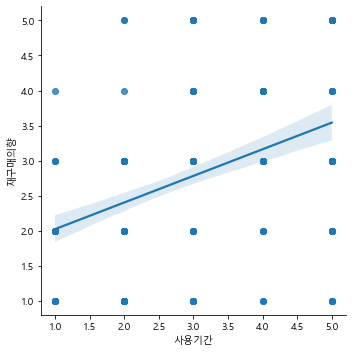

In [81]:
from matplotlib import font_manager, rc, rcParams
rc('font', family='Malgun Gothic')
rcParams['font.family']

sns.lmplot(y='재구매의향',x='사용기간',data=df)